# Assessing first connection and visualizations

In [1]:
from src.analysis import Visualizer
from src.database import DatabaseManager
from src.analysis import AnalysisPreparation
import os
from pathlib import Path
import statsmodels 

In [2]:
# download data from database
# Get path to project root (one level up from notebooks directory)
project_root = str(Path().absolute().parent)
print(project_root)
database_path = os.path.join(project_root, 'data')
print (database_path)
db = DatabaseManager(database_file = "overwatch_data.db", base_path=database_path)
db.setup_connection()
player_data = db.query('SELECT * FROM players')
match_data = db.query('SELECT * FROM matches')
player_data = player_data.drop_duplicates(player_data.loc[:, player_data.columns != 'id'])


C:\Users\olexs\Documents\OWCS_Analysis
C:\Users\olexs\Documents\OWCS_Analysis\data


In [3]:
# prepare for visualization
preparation = AnalysisPreparation(player_data, match_data)
preparation.add_duration()
preparation.validate_durations()
preparation.adjust_points()
preparation.calculate_round_duration()
preparation.calculate_derived()
preparation.calculate_value()
new_player_data = preparation.player_data
new_player_data = new_player_data[new_player_data['duration'] > 300]

C:\Users\olexs\Documents\OWCS_Analysis\src\analysis\analysis_preparation.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.match_data[column] = self.match_data[column].apply(ast.literal_eval)
C:\Users\olexs\Documents\OWCS_Analysis\src\analysis\analysis_preparation.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.match_data['duration'] = ((self.match_data['finished_at'] - self.match_data['started_at']) * 0.9)


In [4]:
visualizer = Visualizer(new_player_data)

<Figure size 640x480 with 0 Axes>

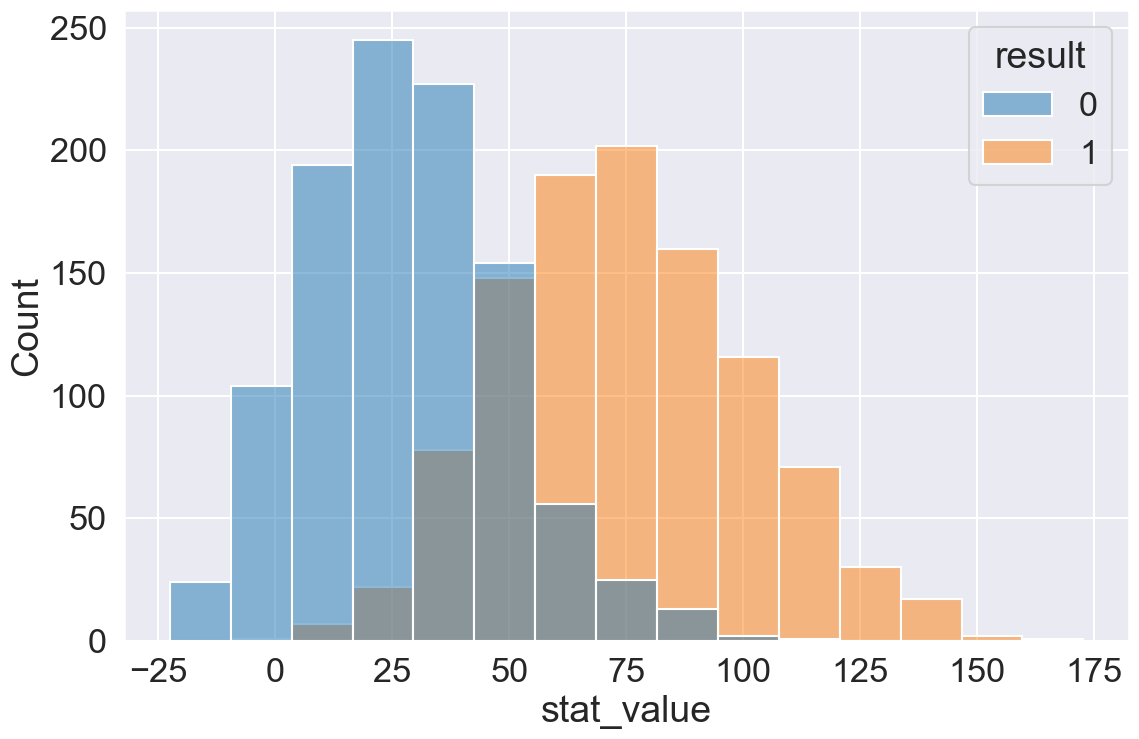

In [5]:
visualizer.filter_by(role = "Support", stat_type = "value")
visualizer.simple_histogram(x_col = "stat_value", n_bins= 15)

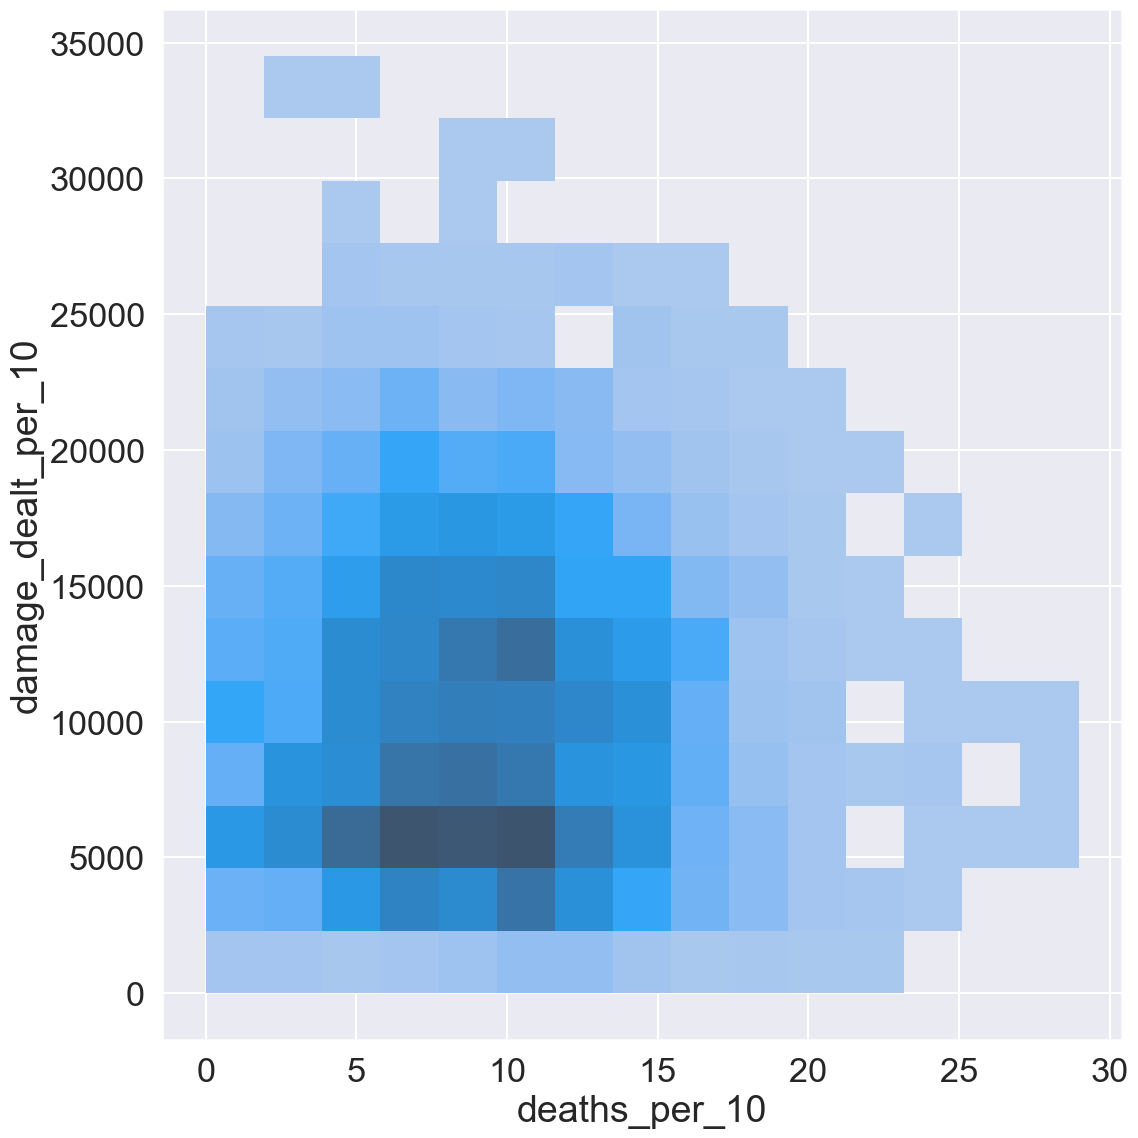

In [8]:
visualizer.histogram_2d("deaths_per_10", "damage_dealt_per_10")

In [7]:
visualizer._wide_data

,id,nickname,match_id,role,eliminations,assists,deaths,kd_ratio,damage_dealt,healing_done,...,result,mode,map,duration,deaths_per_10,eliminations_per_10,assists_per_10,damage_dealt_per_10,healing_done_per_10,value
2,3,CoachZed,1-45ad932e-eb57-4109-8686-4cc6f8317fd9,Tank,18,3,2,9.000000,9416,0,...,1,Control,0x0800000000000662,360.000000,3.333333,30.000000,5.000000,15693.333333,0.000000,81.182311
3,4,CoachZed,1-45ad932e-eb57-4109-8686-4cc6f8317fd9,Tank,28,5,6,4.666667,13780,192,...,1,Hybrid,0x08000000000000D4,630.000000,5.714286,26.666667,4.761905,13123.809524,182.857143,64.411577
6,7,CoachZed,1-8a672da9-1a00-4094-86c7-9aa322f4c4ef,Tank,1,0,6,0.166667,4844,0,...,0,Control,0x08000000000004B7,339.555556,10.602094,1.767016,0.000000,8559.424084,0.000000,-6.664538
7,8,CoachZed,1-8a672da9-1a00-4094-86c7-9aa322f4c4ef,Tank,11,4,8,1.375000,10947,0,...,0,Hybrid,0x0800000000000B4C,424.444444,11.308901,15.549738,5.654450,15474.816754,0.000000,27.518547
10,11,CoachZed,1-8bbfb993-cc11-4f2e-91f2-f6e967c0dc01,Tank,6,2,5,1.200000,6278,782,...,0,Control,0x080000000000066D,395.636364,7.582721,9.099265,3.033088,9520.863971,1185.937500,18.306559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,12643,Gavin687,1-6aab24a4-027d-4acf-8a19-5c0b48c2cdff,Damage,16,2,9,1.777778,8140,11,...,1,Control,0x08000000000004B7,530.181818,10.185185,18.106996,2.263374,9211.934156,12.448560,28.096932
12643,12644,Gavin687,1-6aab24a4-027d-4acf-8a19-5c0b48c2cdff,Damage,28,5,14,2.000000,14798,0,...,1,Hybrid,0x08000000000000D4,441.818182,19.012346,38.024691,6.790123,20096.049383,0.000000,82.337707
12647,12648,fabbyay,1-b3016b8e-5070-4fb9-ae6f-985321545928,Support,21,27,2,10.500000,4835,11035,...,1,Hybrid,0x08000000000000D4,350.000000,3.428571,36.000000,46.285714,8288.571429,18917.142857,123.539955
12649,12650,jswessler,1-b3016b8e-5070-4fb9-ae6f-985321545928,Support,8,5,7,1.142857,5402,6764,...,0,Hybrid,0x08000000000000D4,350.000000,12.000000,13.714286,8.571429,9260.571429,11595.428571,30.660000
